<a href="https://colab.research.google.com/github/rizkaaa19/MachineLearning/blob/main/week6/K_Means_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rizka Rahmadina

NIM : 1103204115

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

In [ ]:
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
print(df)

     Age  Annual Income  Spending Score
0     19             15              39
1     21             15              81
2     20             16               6
3     23             16              77
4     31             17              40
..   ...            ...             ...
195   35            120              79
196   45            126              28
197   32            126              74
198   32            137              18
199   30            137              83

[200 rows x 3 columns]


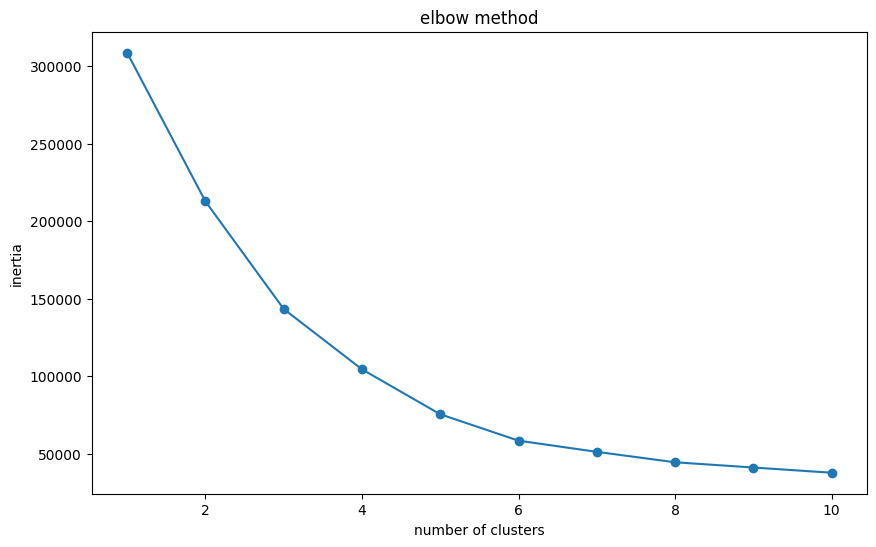

In [ ]:
#membuat list kosong untuk menampung nilai inersia
inertia = []

#mengambil kolom yang diperlukan
column = df[['Age', 'Annual Income', 'Spending Score']]

#melakukan perulangan untuk nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(column)
    inertia.append(kmeans.inertia_)

#memvisualisasikan metode elbow
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

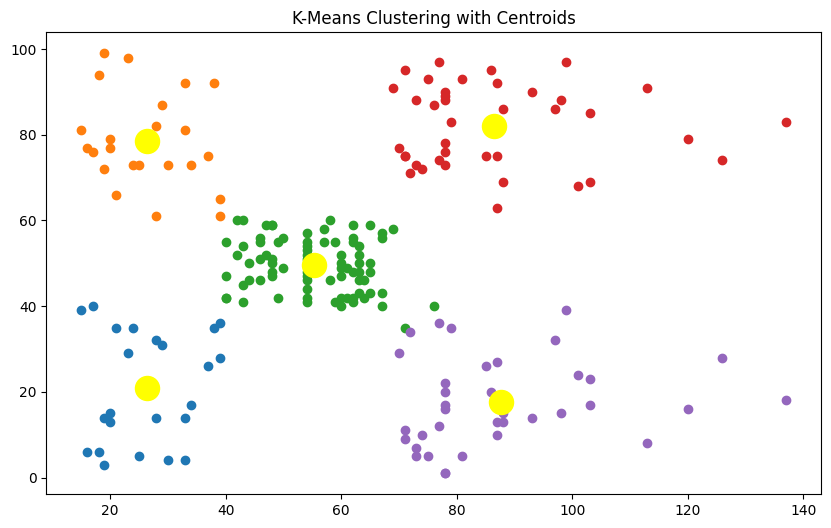

In [ ]:
#mengambil kolom yang diperlukan
column = df[['Age', 'Annual Income', 'Spending Score']]

#membuat model K-Means dengan 5 cluster
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)

#melakukan clustering
df['label'] = kmeans.fit_predict(column)

#memvisualisasikan data berdasarkan label cluster
plt.figure(figsize=(10,6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['Annual Income'], df[df['label'] == label]['Spending Score'], label=f'Cluster {label}')

#memvisualisasikan posisi centroid
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel

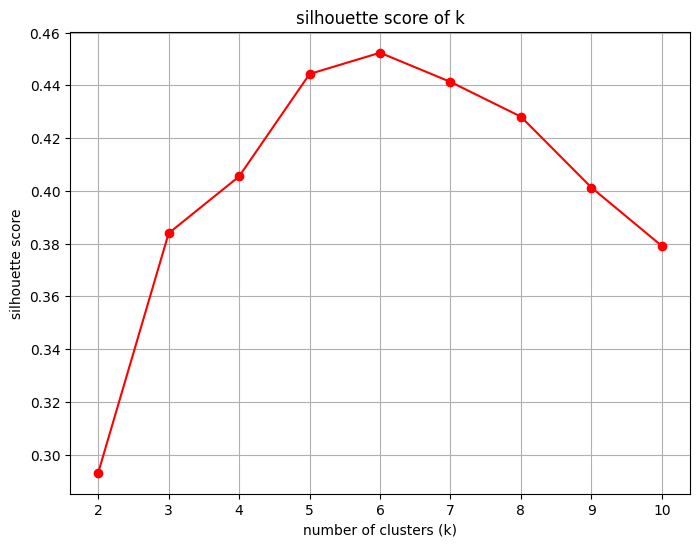



silhouette score for k = 2 : 0.293166070535953
silhouette score for k = 3 : 0.3839349967742105
silhouette score for k = 4 : 0.40546302077733304
silhouette score for k = 5 : 0.44428597560893024
silhouette score for k = 6 : 0.4523443947724053
silhouette score for k = 7 : 0.4412807576186172
silhouette score for k = 8 : 0.4280971079746162
silhouette score for k = 9 : 0.40126260157691634
silhouette score for k = 10 : 0.3790978814868016


In [ ]:
#mengambil kolom yang diperlukan
column = df[['Age', 'Annual Income', 'Spending Score']]

#membuat list kosong untuk menampung nilai silhouette score
silhouette_scores = []

#melakukan perulangan untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(column)
    silhouette_avg = silhouette_score(column, labels)
    silhouette_scores.append(silhouette_avg)

#menampilkan grafik cluster
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='r')
plt.title('silhouette score of k')
plt.xlabel('number of clusters (k)')
plt.ylabel('silhouette score')
plt.grid(True)
plt.show()
print("\n")

#menampilkan nilai silhouette score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"silhouette score for k = {k} : {score}")

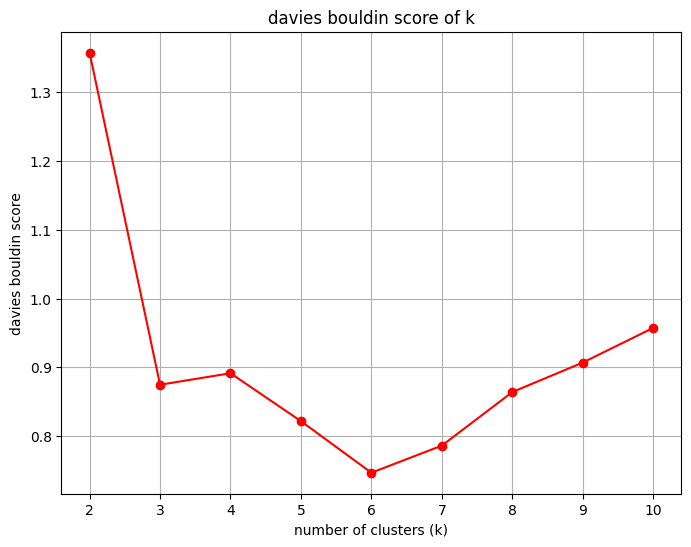



davies bouldin score for k = 2 : 1.3571023143309133
davies bouldin score for k = 3 : 0.8748062648492879
davies bouldin score for k = 4 : 0.8914904209843165
davies bouldin score for k = 5 : 0.8218781633199781
davies bouldin score for k = 6 : 0.746974007275528
davies bouldin score for k = 7 : 0.7863764854525301
davies bouldin score for k = 8 : 0.8641438876447516
davies bouldin score for k = 9 : 0.9070119449899816
davies bouldin score for k = 10 : 0.9573604236246045


In [ ]:
column = df[['Age', 'Annual Income', 'Spending Score']]

davies_bouldin_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(column)
    davies_bouldin = davies_bouldin_score(column, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

#menampilkan grafik cluster
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='-', color='r')
plt.title('davies bouldin score of k')
plt.xlabel('number of clusters (k)')
plt.ylabel('davies bouldin score')
plt.grid(True)
plt.show()
print("\n")

for k, score in zip(range(2, 11), davies_bouldin_scores):
    print(f"davies bouldin score for k = {k} : {score}")

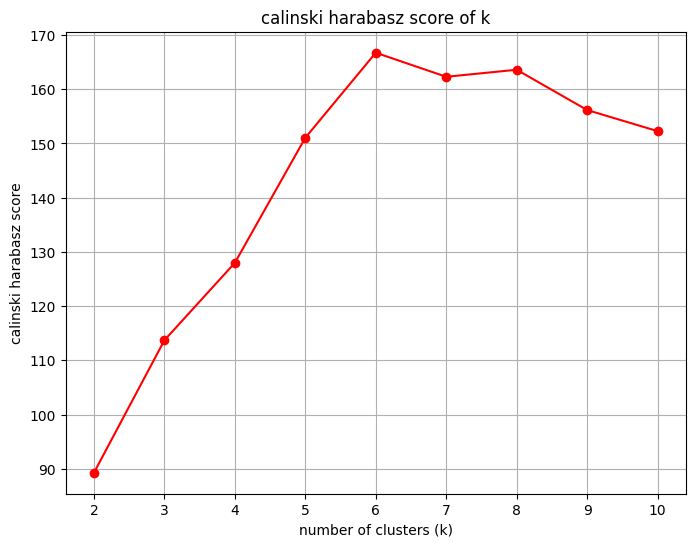



calinski harabasz score for k = 2: 89.28096999467428
calinski harabasz score for k = 3: 113.70507138642179
calinski harabasz score for k = 4: 127.9838294818919
calinski harabasz score for k = 5: 151.04386000160667
calinski harabasz score for k = 6: 166.7204931788687
calinski harabasz score for k = 7: 162.2852042279988
calinski harabasz score for k = 8: 163.58062876554533
calinski harabasz score for k = 9: 156.15508760692356
calinski harabasz score for k = 10: 152.26426170758603


In [ ]:
column = df[['Age', 'Annual Income', 'Spending Score']]

calinski_harabasz_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(column)
    calinski_harabasz = calinski_harabasz_score(column, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz)

#menampilkan grafik cluster
k_values = range(2, 11)
plt.figure(figsize=(8, 6))
plt.plot(k_values, calinski_harabasz_scores, marker='o', linestyle='-', color='r')
plt.title('calinski harabasz score of k')
plt.xlabel('number of clusters (k)')
plt.ylabel('calinski harabasz score')
plt.grid(True)
plt.show()
print("\n")

for k, score in zip(range(2, 11), calinski_harabasz_scores):
    print(f"calinski harabasz score for k = {k}: {score}")